# Chapter 9

## 9.2. Fundamentals of image processing

### 9.2.5. Feature extraction and pattern recognition

Feature extraction

Area: 587.0
Perimeter: 153.53300858899104
Eccentricity: 0.9203623475835696
Centroid: (6.6183986371379895, 73.40885860306643)
Area: 34.0
Perimeter: 21.65685424949238
Eccentricity: 0.8855568949421855
Centroid: (1.4411764705882353, 112.8529411764706)
Area: 906.0
Perimeter: 237.40916292848976
Eccentricity: 0.8826528982094266
Centroid: (22.86092715231788, 149.6147902869757)
Area: 4170.0
Perimeter: 809.2935059634514
Eccentricity: 0.990938259045283
Centroid: (110.70767386091127, 332.7613908872902)
Area: 1.0
Perimeter: 0.0
Eccentricity: 0
Centroid: (0.0, 324.0)
Area: 90093.0
Perimeter: 8555.017274734673
Eccentricity: 0.6266794978331454
Centroid: (324.6956367309336, 345.51279233680754)
Area: 5.0
Perimeter: 5.207106781186548
Eccentricity: 0.816496580927726
Centroid: (2.8, 123.6)
Area: 3.0
Perimeter: 1.0
Eccentricity: 1.0
Centroid: (2.0, 320.0)
Area: 3.0
Perimeter: 3.414213562373095
Eccentricity: 0.816496580927726
Centroid: (4.666666666666667, 314.6666666666667)
Area: 21.0
Perimeter: 16.828427124

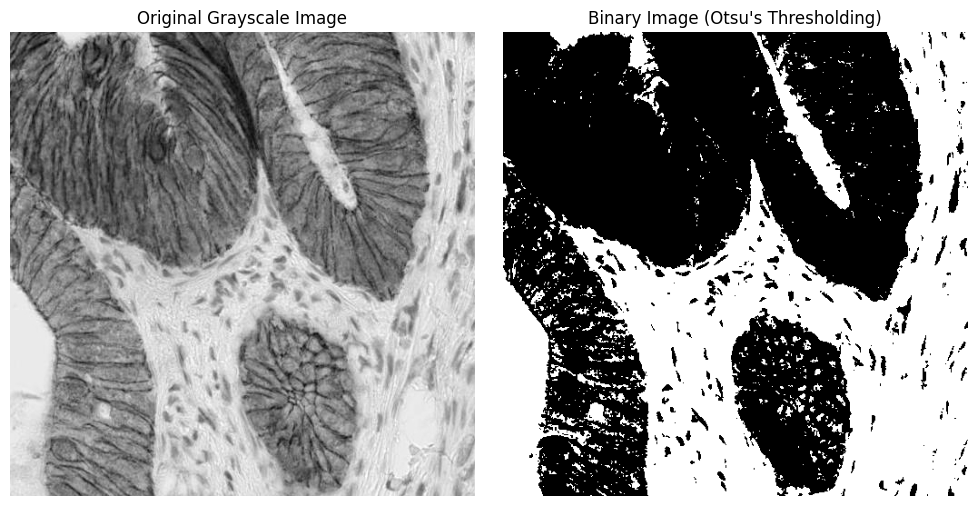

In [2]:
import matplotlib.pyplot as plt
from skimage import data, measure, color, io, feature
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import regionprops
import numpy as np

# Load a sample image and convert to grayscale
image = io.imread('example_data/ihc.png')  # Replace with your biomedical image
gray_image = rgb2gray(image)

# Apply Otsu's thresholding to create a binary image for segmentation
thresh_value = threshold_otsu(gray_image)
binary_image = gray_image > thresh_value

# Label connected regions
label_image = measure.label(binary_image)

# Extract region properties (shape features) from labeled regions
regions = regionprops(label_image)

# Display results for first region (as an example)
for region in regions:
    print(f"Area: {region.area}")
    print(f"Perimeter: {region.perimeter}")
    print(f"Eccentricity: {region.eccentricity}")
    print(f"Centroid: {region.centroid}")

# Feature extraction: Texture using GLCM (Gray Level Co-occurrence Matrix)
from skimage.feature import graycomatrix, graycoprops

# Define GLCM texture properties
glcm = graycomatrix((gray_image * 255).astype('uint8'), distances=[5], 
                    angles=[0], symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')

print(f"Texture Contrast: {contrast[0, 0]}")
print(f"Texture Dissimilarity: {dissimilarity[0, 0]}")

# Display original and binary image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Binary Image (Otsu\'s Thresholding)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

Pattern recognition

Image data shape: (1797, 8, 8)


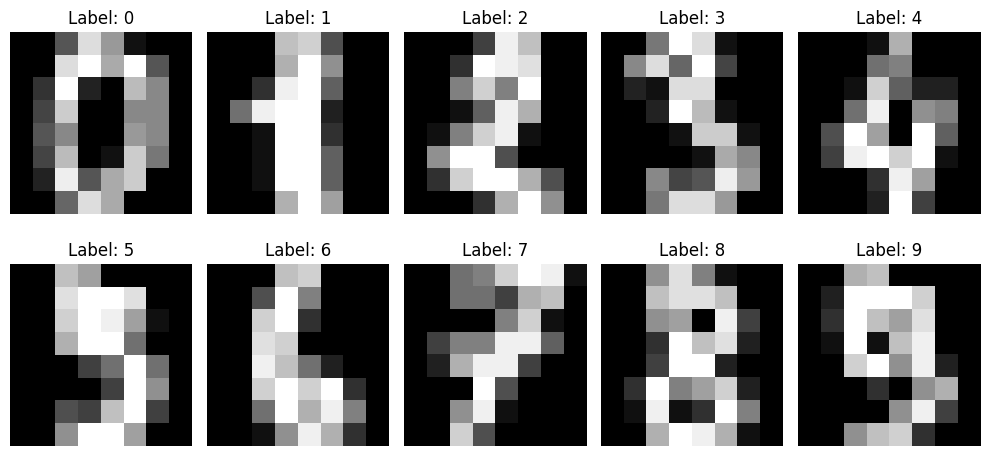

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the MNIST dataset from sklearn
digits = datasets.load_digits()

# The images are stored as 8x8 pixel grids
print("Image data shape:", digits.images.shape)

# Plot some example digits from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Flatten the image data for pattern recognition (feature extraction)
# Each image is 8x8 pixels, so we flatten them into 64-pixel vectors
X = digits.images.reshape((len(digits.images), -1))
y = digits.target  # Target labels (the digits 0-9)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Classifier (SVC)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

